In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: Plot m_eq, n_eq, h_eq and t_m, t_n, t_eq

In [2]:
def m_eq(V):
    return .1*(25-V)/(np.exp((25-V)/10)-1) / ( .1*(25-V)/(np.exp((25-V)/10)-1) + 4*np.exp(-V/18))

def n_eq(V):
    return .01*(10-V/(np.exp((10-V)/10))) / ( .01*(10-V/(np.exp((10-V)/10)))  + .125*np.exp(-V/80) )

def h_eq(V):
    return .07*np.exp(-V/20)/(.07*np.exp(-V/20) + 1/(np.exp((30-V)/10) + 1) )

def t_m(V):
    return 1/(.1*(25-V)/(np.exp((25-V)/10)-1) + 4*np.exp(-V/18)  )

def t_n(V):
    return 1/( .01*(10-V)/(np.exp((10-V)/10) -1 ) + .125*np.exp(-V/80))

def t_h(V):
    return 1/(.07*np.exp(-V/20 + 1/(np.exp((30-V)/10)+1)  )  )


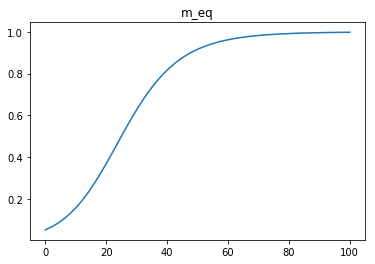

In [3]:
V = np.linspace(0,100)
plt.plot(V,m_eq(V))
plt.title("m_eq")

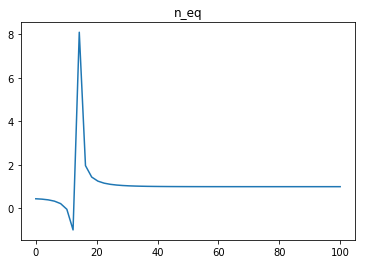

In [4]:
plt.plot(V,n_eq(V))
plt.title("n_eq")

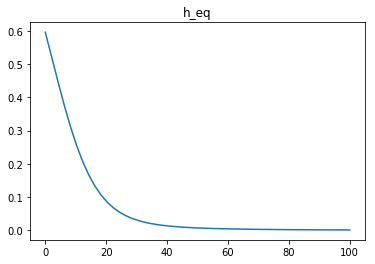

In [5]:
plt.plot(V,h_eq(V))
plt.title("h_eq")

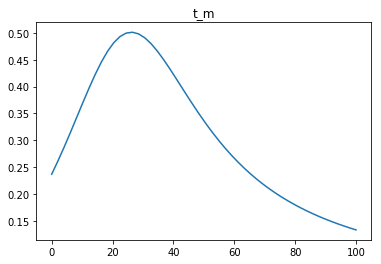

In [6]:
plt.plot(V,t_m(V))
plt.title("t_m")

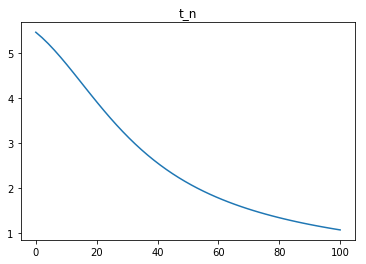

In [7]:
plt.plot(V,t_n(V))
plt.title("t_n")

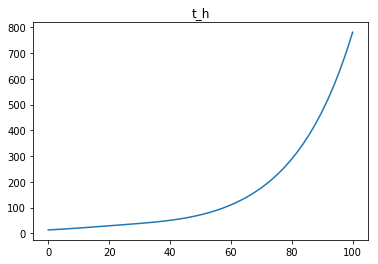

In [8]:
plt.plot(V,t_h(V))
plt.title("t_h")

## Part B

In [9]:
#dm/dt = -1/t_m (m - m_eq)
gL = .3
gNa = 120
gK = 36
VL = 10.613 * 10**-3
VNa = 115 * 10**-3
VK = -12 * 10**-3
C = .001 * 10**-3 #converted 1 uF to mF

def HH(f,t):
    V,n,m,h = f
    dV = 1/C* ( gL*(V - VL) - gNa*m**3*h*(V-VNa) - gK*n**4*(V-VK) + I )
    dn = -1/t_n(V) * (n - n_eq(V))
    dm = -1/t_m(V) * (m - m_eq(V))
    dh = -1/t_h(V) * (h - h_eq(V))
    return [dV, dn, dm, dh]



## I = 0mA

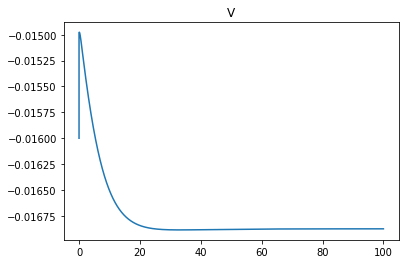

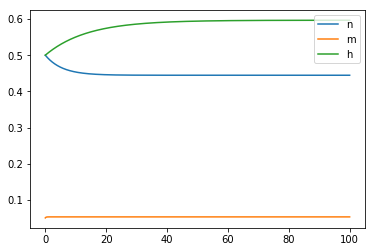

In [10]:
I = 0

t = np.linspace(0,100,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [-.016,.5,.05,.5],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()
#print(sol)

## I = 10 mA

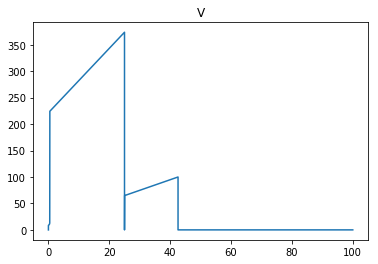

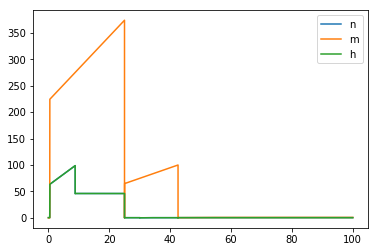

[[-0.01675     0.45        0.01        0.6       ]
 [ 8.48397501  0.44999483  0.01003611  0.59999851]
 [ 8.48446657  0.44998959  0.01007238  0.59999701]
 ...
 [ 0.05916089  0.56176315  0.94881238  0.437724  ]
 [ 0.05916089  0.56176315  0.94881238  0.437724  ]
 [ 0.05916089  0.56176316  0.94881239  0.437724  ]]


In [27]:
I = 10

t = np.linspace(0,100,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [-.01675,.45,.01,.6],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()
print(sol)

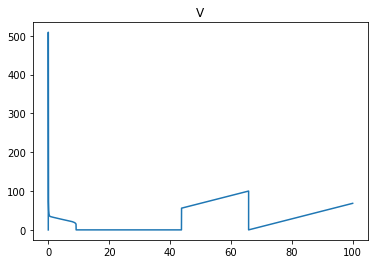

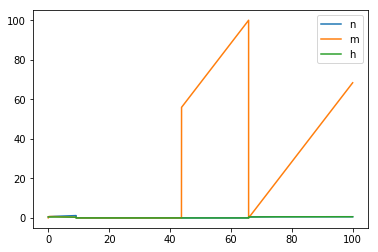

In [14]:
I = 1000

t = np.linspace(0,100,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [-.1,.5,.05,.5],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()
#print(sol)